#Importing Libraries

In [74]:
! pip install -q kaggle
! pip install opendatasets

In [75]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"bhoomiprajapati05","key":"03c6909da87905e0385420ac74ff6e8f"}'}

In [119]:

import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/utkarshtomar736/odi-mens-cricket-match-data-2002-2023/?select=ODI_Match_Data.csv")

Skipping, found downloaded files in "./odi-mens-cricket-match-data-2002-2023" (use force=True to force download)


In [120]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading Data

In [124]:
#loading datasets
match_info = pd.read_csv('/content/odi-mens-cricket-match-data-2002-2023/ODI_Match_info.csv')
match_data = pd.read_csv('/content/odi-mens-cricket-match-data-2002-2023/ODI_Match_Data.csv', dtype={'season': str})

In [125]:
match_info.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan


In [126]:
match_data.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


#Data Cleaning

##Checking for Null Values

In [127]:
#checking for missing values
match_info.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [128]:
#checking for missing values
match_data.isnull().sum()

match_id                        0
season                          0
start_date                      0
venue                           0
innings                         0
ball                            0
batting_team                    0
bowling_team                    0
striker                         0
non_striker                     0
bowler                          0
runs_off_bat                    0
extras                          0
wides                     1236113
noballs                   1260045
byes                      1263141
legbyes                   1252200
penalty                   1265085
wicket_type               1230629
player_dismissed          1230629
other_wicket_type         1265103
other_player_dismissed    1265103
cricsheet_id                    0
dtype: int64

##Removing Duplicates

In [129]:
#removing duplicates if any
match_data.drop_duplicates(inplace=True)
match_info.drop_duplicates(inplace=True)

##Checking Data types

In [130]:
match_info.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [131]:
match_data.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
cricsheet_id                int64
dtype: object

In [132]:
#converting date coluumns into datetime
match_info['date'] = pd.to_datetime(match_info['date'])
match_data['start_date'] = pd.to_datetime(match_data['start_date'])

#Exploratory Data Analysis

In [133]:
#exploring categorical columns
match_info['team1'].value_counts()

Australia                   254
India                       252
England                     225
Sri Lanka                   192
Bangladesh                  191
New Zealand                 182
South Africa                172
West Indies                 172
Zimbabwe                    144
Pakistan                    139
Ireland                      83
Afghanistan                  66
Scotland                     50
United Arab Emirates         47
Netherlands                  26
Kenya                        25
Canada                       24
Namibia                      23
Papua New Guinea             23
Oman                         22
United States of America     22
Nepal                        21
Hong Kong                    10
Bermuda                       7
Africa XI                     5
Jersey                        2
Name: team1, dtype: int64

In [134]:
match_info['city'].value_counts()

Mirpur              89
Colombo             87
London              83
Bulawayo            63
Harare              57
                    ..
Jamshedpur           1
Lincoln              1
Bready               1
Tarouba              1
Pietermaritzburg     1
Name: city, Length: 145, dtype: int64

###Match Count per season

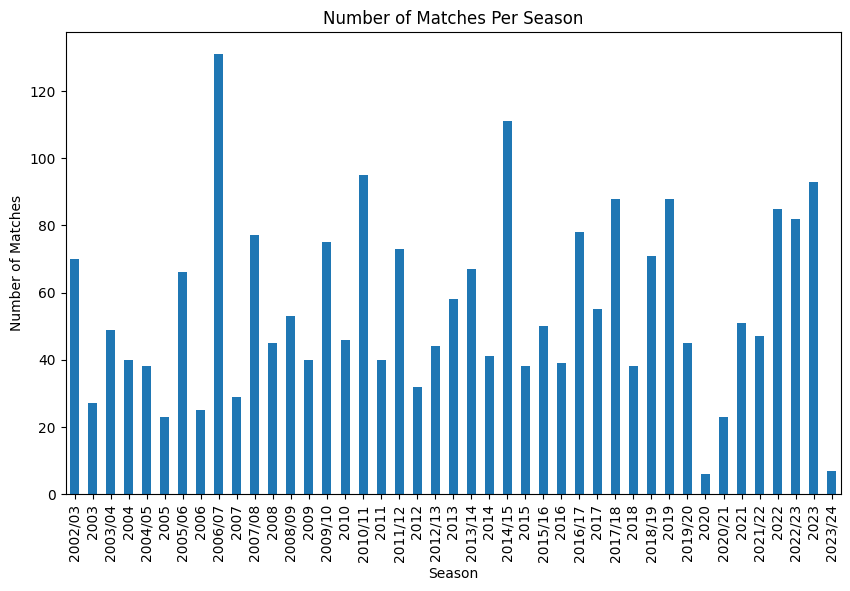

In [135]:
plt.figure(figsize=(10, 6))
match_info['season'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Matches Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

The bar plot illustrates the distribution of cricket matches across seasons, with taller bars indicating busier periods and shorter bars representing quieter seasons. It offers a quick visual overview of the historical frequency of matches over different cricket seasons. 2006 was busiest season.

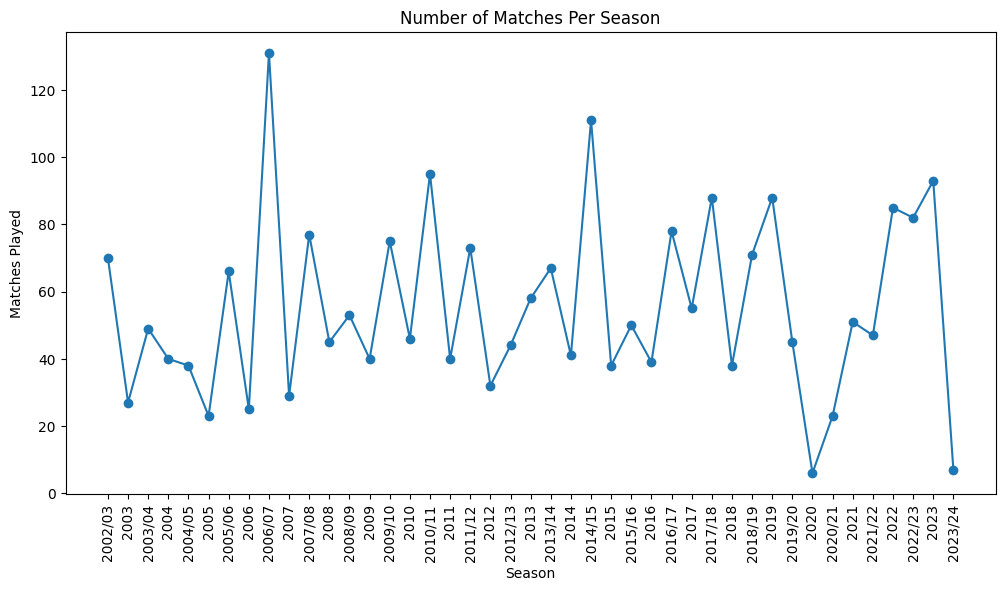

In [136]:
# Calculate number of matches per season
matches_per_season = match_info['season'].value_counts().sort_index()

# Create a line plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(matches_per_season.index, matches_per_season.values, marker='o')
plt.title('Number of Matches Per Season')
plt.xlabel('Season')
plt.ylabel('Matches Played')
plt.xticks(rotation=90)
plt.show()

The line plot illustrates the varying intensity of cricket matches across seasons. Peaks represent busier seasons, while troughs indicate quieter periods, providing a concise overview of historical match frequency trends.

###Team wise wins

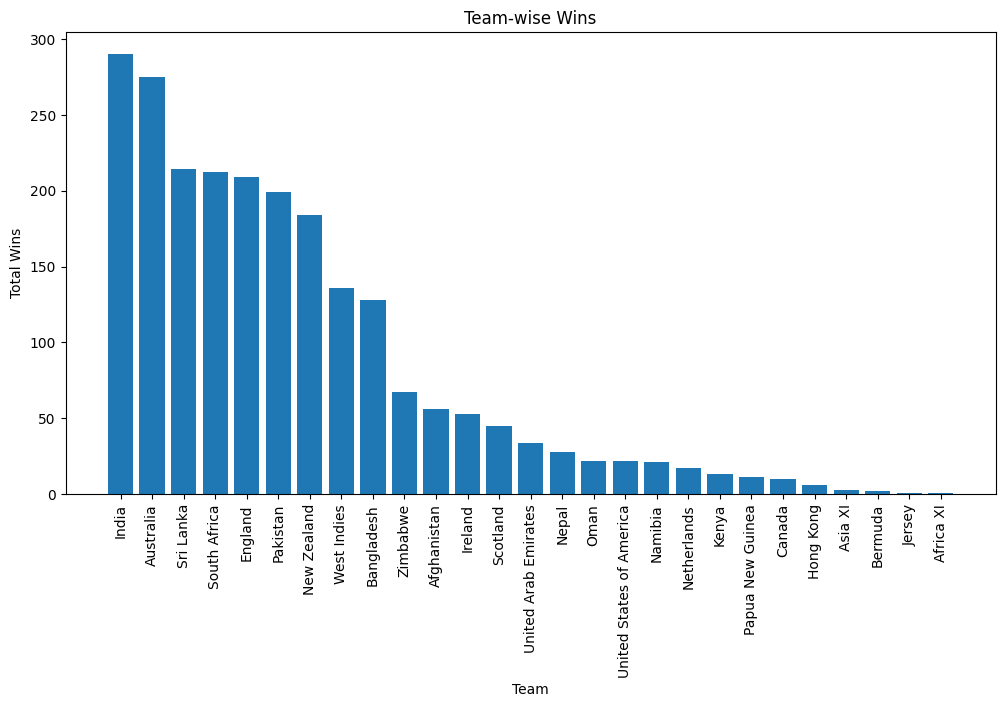

In [137]:
# Calculate team-wise wins
team_wins = match_info['winner'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(team_wins.index, team_wins.values)
plt.title('Team-wise Wins')
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=90)
plt.show()

The bar plot titled "Team-wise Wins" visualizes the total number of victories for each cricket team. The varying bar heights indicate the relative success of teams, with taller bars representing teams with more overall wins, offering a quick comparison of their historical performance.

###Match Venue Analysis

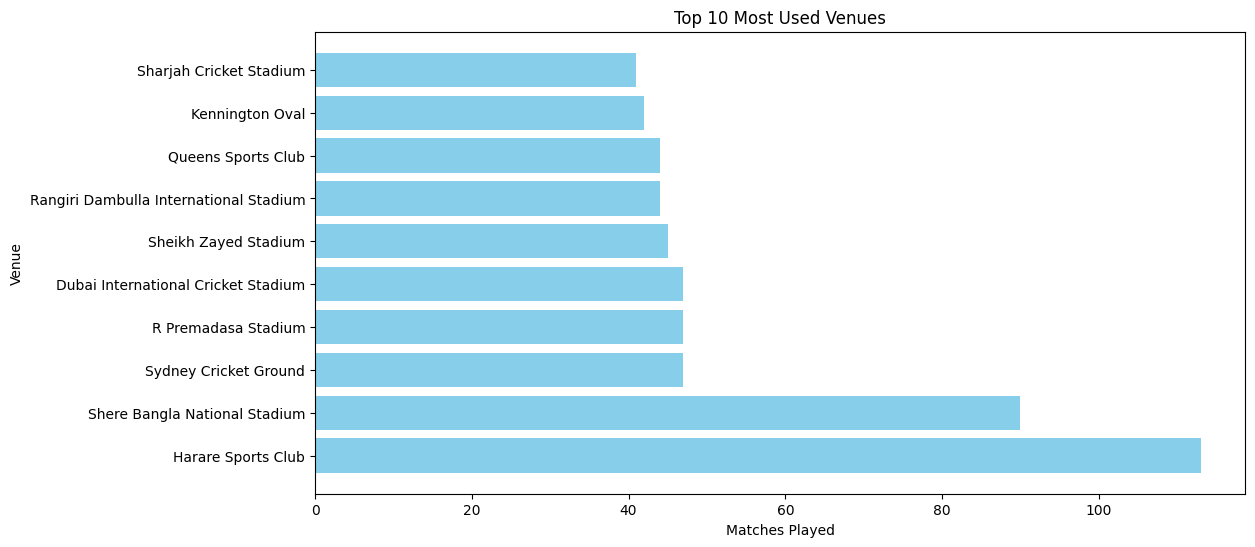

In [138]:
# Calculate top 10 most used venues
top_venues = match_info['venue'].value_counts().head(10)

# Define colors for the bars
bar_colors = ['skyblue' for _ in range(len(top_venues))]

# Create a horizontal bar plot using Matplotlib with colors
plt.figure(figsize=(12, 6))
plt.barh(top_venues.index, top_venues.values, color=bar_colors)
plt.title('Top 10 Most Used Venues')
plt.xlabel('Matches Played')
plt.ylabel('Venue')
plt.show()


The horizontal bar plot titled "Top 10 Most Used Venues" highlights the venues that have hosted the highest number of cricket matches. Each bar represents a venue, and the length of the bars reflects the frequency of matches held at those locations. This visualization offers a quick insight into the popularity of cricket venues, showcasing the top 10 most utilized sites based on match occurrences.

###Player of Match Analysis

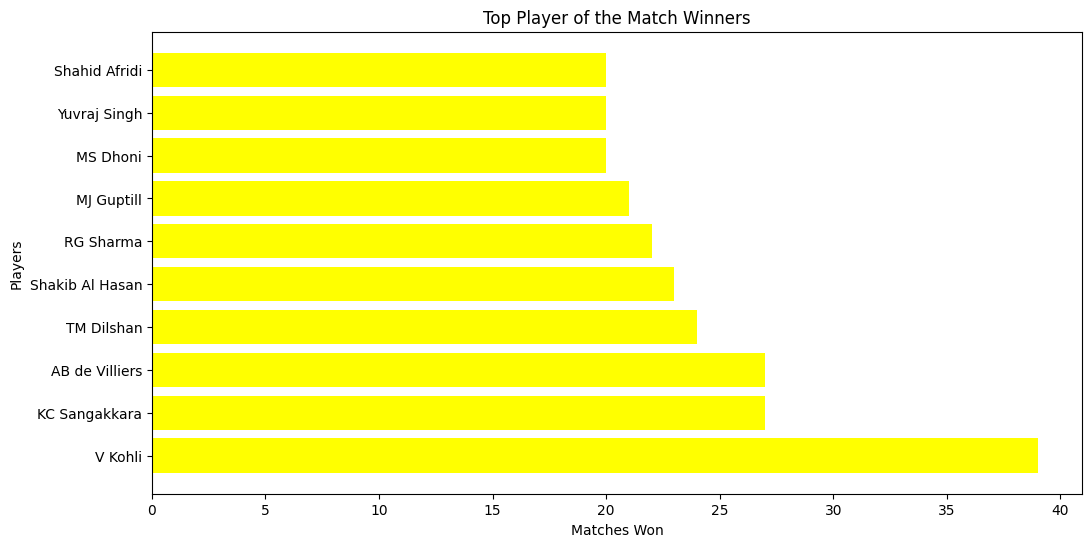

In [139]:
# Calculate top 10 players of the match winners
top_players = match_info['player_of_match'].value_counts().head(10)

# Create a horizontal bar plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(top_players.index, top_players.values, color='yellow')
plt.title('Top Player of the Match Winners')
plt.xlabel('Matches Won')
plt.ylabel('Players')
plt.show()


The horizontal bar plot titled "Top Player of the Match Winners" displays the players who have received the most "Player of the Match" awards. Yellow bars represent the frequency of each player's recognition, offering a concise overview of the top performers in cricket matches based on this accolade.

###Wins by Runs

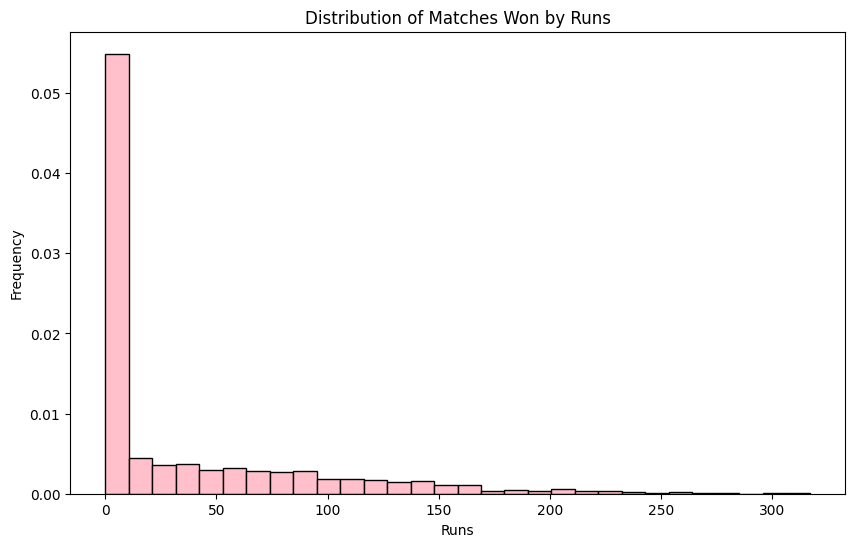

In [140]:
# Create a histogram plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(match_info['win_by_runs'], bins=30, color='pink', edgecolor='black', density=True)
plt.title('Distribution of Matches Won by Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

The histogram titled "Distribution of Matches Won by Runs" visually represents the spread of match outcomes where teams secured victories based on run differentials. The pink bars showcase the frequency distribution of wins across various run margins, providing a snapshot of the diverse ways teams have clinched victories in cricket matches.

###Wins by Wickets

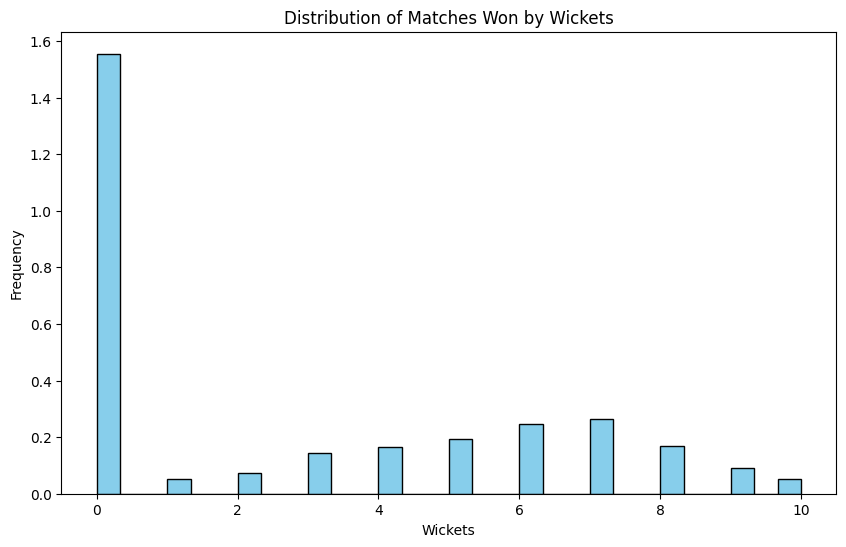

In [141]:
#Create a histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(match_info['win_by_wickets'], bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Distribution of Matches Won by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

The histogram titled "Distribution of Matches Won by Wickets" illustrates the frequency distribution of match outcomes based on the number of wickets taken by the winning team.

###Choice of play after winning toss and results

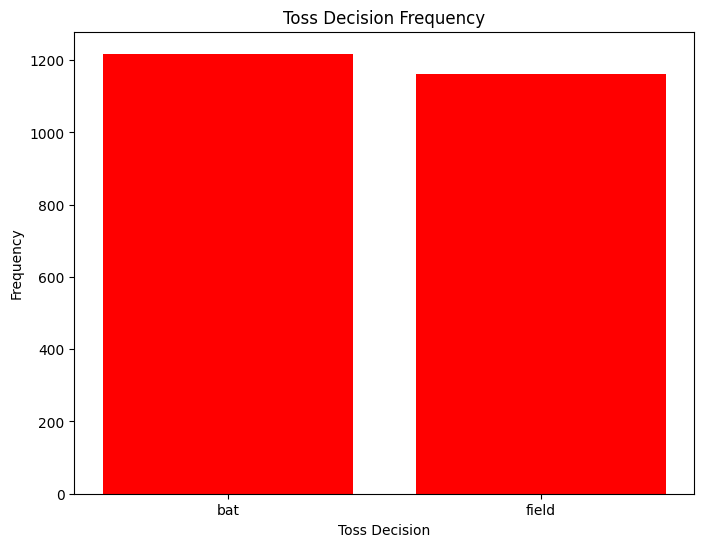

In [142]:
#toss decision
toss_decision = match_info['toss_decision'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(toss_decision.index, toss_decision.values, color='red')
plt.title('Toss Decision Frequency')
plt.xlabel('Toss Decision')
plt.ylabel('Frequency')
plt.show()

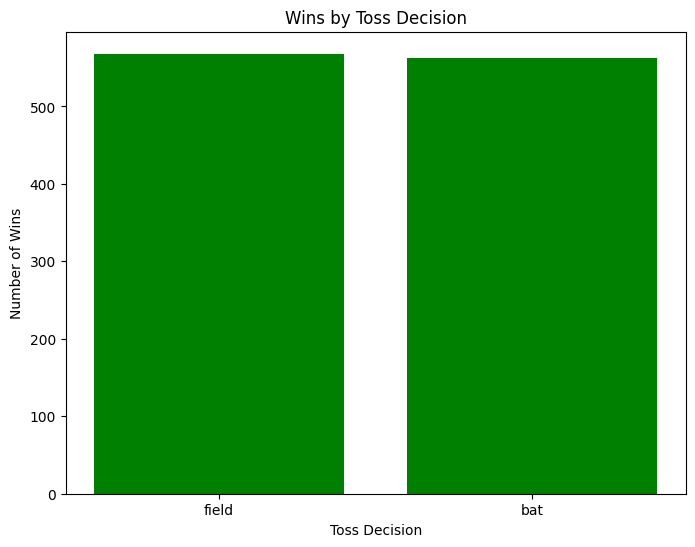

In [170]:
# Calculate the number of wins based on the toss decision
toss_wins = match_info[match_info['winner'] == match_info['toss_winner']]['toss_decision'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(toss_wins.index, toss_wins.values, color='green')
plt.title('Wins by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Wins')
plt.show()




This bar plot titled "Wins by Toss Decision" depicts the number of wins corresponding to each toss decision, providing insights into the effectiveness of choosing to bat or field after winning the toss. The green bars represent the count of wins based on the chosen toss decision.

This bar plot titled "Wins by Toss Decision" depicts the number of wins corresponding to each toss decision, providing insights into the effectiveness of choosing to bat or field after winning the toss. The green bars represent the count of wins based on the chosen toss decision.

###Top 10 Run scorers

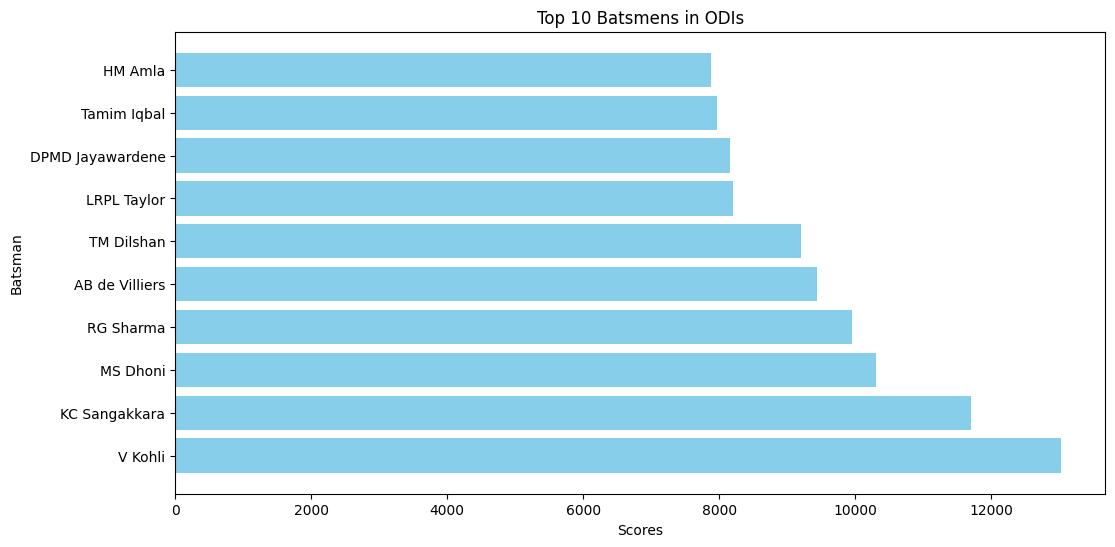

In [143]:
#identifying top 10 run scorers
batsmen_total_runs = match_data.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(batsmen_total_runs.index, batsmen_total_runs.values, color='skyblue')
plt.title('Top 10 Batsmens in ODIs')
plt.xlabel('Scores')
plt.ylabel('Batsman')
plt.show()


###Top 10 Wicket takers

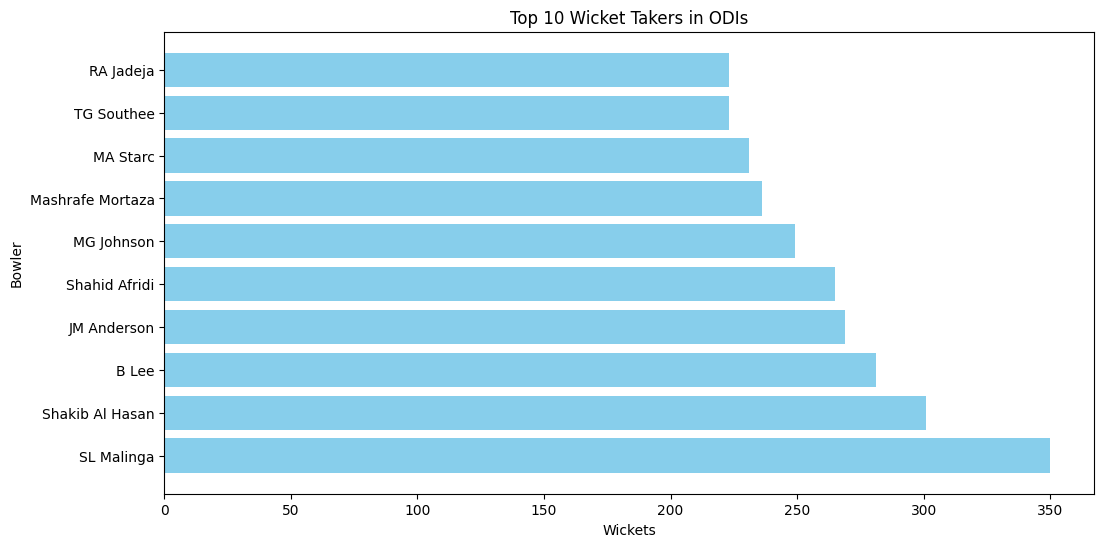

In [144]:
#identifying top 10 wicket takers
top_bowlers_wickets = match_data[match_data['wicket_type'].notnull()].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)

# Create a horizontal bar plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(top_bowlers_wickets.index, top_bowlers_wickets.values, color='skyblue')
plt.title('Top 10 Wicket Takers in ODIs')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

## Distribution of runs in 2023 World Cup

In [148]:
# Display the column names in match_data DataFrame
print("Columns in match_data:", match_data.columns)

# Display the column names in match_info DataFrame
print("Columns in match_info:", match_info.columns)



Columns in match_data: Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')
Columns in match_info: Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


<ipython-input-149-7ab16ddc9ea8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



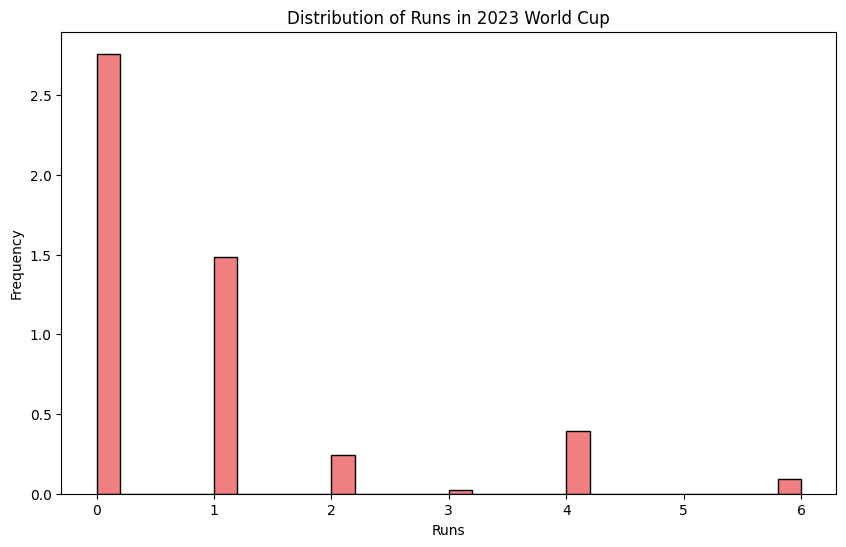

In [149]:
# Filter data for the 2023 World Cup
world_cup_2023_data = match_data[match_data['start_date'].dt.year == 2023]

# Determine the winning team for each match
world_cup_2023_data['winner'] = world_cup_2023_data.apply(lambda row: row['batting_team'] if row['runs_off_bat'] > 0 else row['bowling_team'], axis=1)
# Distribution of runs in 2023 World Cup
plt.figure(figsize=(10, 6))
plt.hist(world_cup_2023_data['runs_off_bat'], bins=30, color='lightcoral', edgecolor='black', density=True)
plt.title('Distribution of Runs in 2023 World Cup')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


Distribution of runs in the 2023 World Cup is visualized with a histogram, showcasing the frequency of runs scored by teams in each match.

#Deliveries

## Dataset

In [150]:
# Load the data
df = pd.read_csv("/content/deliveries.csv")

In [151]:
df.shape

(17380, 22)

In [152]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

In [154]:
# Find null percentage in each column
null_percentage = (df.isnull().mean() * 100).round(2)
null_percentage

match_id                    0.00
season                      0.00
start_date                  0.00
venue                       0.00
innings                     0.00
ball                        0.00
batting_team                0.00
bowling_team                0.00
striker                     0.00
non_striker                 0.00
bowler                      0.00
runs_off_bat                0.00
extras                      0.00
wides                      97.52
noballs                    99.76
byes                       99.85
legbyes                    99.33
penalty                    99.99
wicket_type                97.17
player_dismissed           97.17
other_wicket_type         100.00
other_player_dismissed    100.00
dtype: float64

In [155]:
# Remove columns with high percent of null
columns_to_remove = ['wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type',
       'player_dismissed', 'other_wicket_type', 'other_player_dismissed' ]
df = df.drop(columns=columns_to_remove)

In [156]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0


# EDA

In [171]:
import plotly.express as px

# Create a bar plot using Plotly
fig = px.bar(df['venue'].value_counts().reset_index(), x='index', y='venue', color='venue', labels={'index': 'Venue', 'venue': 'Count'})
fig.update_layout(title='Count of Venue', xaxis_title='Venue', yaxis_title='Count', template='plotly_dark')
fig.show()


Here, we can see that most balls are played in MA Chidambaram Stadium.

In [172]:

# Create a bar plot using Plotly
fig = px.bar(df['batting_team'].value_counts().reset_index(), x='index', y='batting_team', color='batting_team',
             labels={'index': 'Batting Team', 'batting_team': 'Count'})
fig.update_layout(title='How Many Balls Each Team Faced', xaxis_title='Batting Team', yaxis_title='Count', template='plotly_dark')
fig.show()


here South Africa face most ball.

In [173]:
import plotly.express as px

# Create a bar plot using Plotly
fig = px.bar(df_top15['striker'].value_counts().reset_index(), x='index', y='striker', color='striker',
             labels={'index': 'Striker', 'striker': 'Count'})
fig.update_layout(title='Top 15 Players According to Balls Faced', xaxis_title='Striker', yaxis_title='Count', template='plotly_dark')
fig.show()


Here we can see top 15 batsman that faced most ball and from that we can see that Q de Kock play around 500 ball.



In [174]:
inning_ball = df["innings"].value_counts()
inning_ball

1    9493
2    7887
Name: innings, dtype: int64

Text(0, 0.5, 'Total ball in each inning')

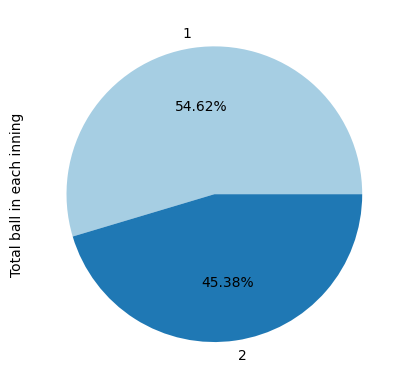

In [175]:
inning_ball = df["innings"].value_counts()
piec_colors = sns.color_palette('Paired')[0:len(inning_ball)]
inning_ball.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.ylabel('Total ball in each inning')

Here in inning 1 thereare total 9493 balls played and in innning 2 7887 balls were played.

In [176]:
import plotly.express as px

# Create a bar plot using Plotly
fig = px.bar(df_top15['bowler'].value_counts().reset_index(), x='index', y='bowler', color='bowler',
             labels={'index': 'Bowler', 'bowler': 'Count'})
fig.update_layout(title='Top 15 Bowlers', xaxis_title='Bowler', yaxis_title='Count', template='plotly_dark')
fig.show()


In [177]:

# Group by 'Batsman' and calculate the total runs for each batsman
total_runs_by_batsman = df.groupby('striker')['runs_off_bat'].sum().reset_index()

# Sort the DataFrame by total runs and get the top 10 players
top_10_players = total_runs_by_batsman.sort_values(by='runs_off_bat', ascending=False).head(10)

# Display the result
print(top_10_players)

               striker  runs_off_bat
101          Q de Kock           545
103         R Ravindra           415
22           DA Warner           413
106          RG Sharma           398
4           AK Markram           362
87     Mohammad Rizwan           359
137            V Kohli           354
37   HE van der Dussen           353
24         DJ Mitchell           346
8    Abdullah Shafique           332


Here we can see top 10 batsman. and we can see that Q de Kock run most.

In [178]:
import plotly.express as px

data = df[['venue', 'bowler']]

for col in data.columns:
    fig = px.histogram(data, x=col, title=f'Distribution of {col}')
    fig.update_layout(xaxis=dict(tickangle=45))
    fig.show()
